In [1]:
import math
import pandas as pd
import numpy as np
import random
import time

from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import scipy.signal as signal

%matplotlib inline
from Regression_compressive_sensing import *

#### Load/Read the images; plot (“imshow”) the images

(200, 192)


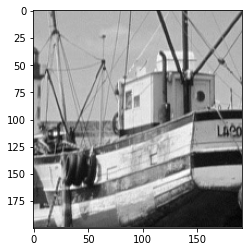

In [2]:
imgBoat = imgRead('fishing_boat.bmp')
print(imgBoat.shape)
imgShow(imgBoat)

(512, 640)


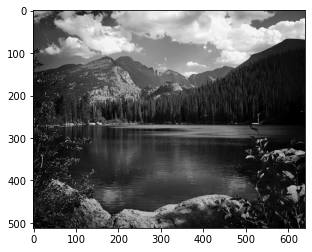

In [3]:
imgNature = imgRead('nature.bmp')
imgShow(imgNature)
print(imgNature.shape)

#### Define K = 8, numSample = 30

In [4]:
K = 8
numSample = 30

#### select a desired KxK block from an image

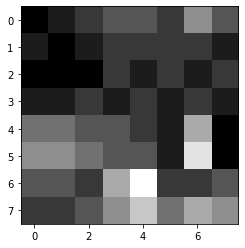

In [5]:
list_blks = divideBlock(imgBoat, K)

boat_block_1 = list_blks[0][0]
imgShow(boat_block_1)

#### sample 30 pixels from a block (to simulate a compressed sensed or corrupted image)

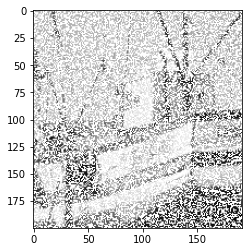

In [6]:
list_samples = samplingBlocksInList(list_blks, numSample)
imgShow(putBlocksTogether(list_samples))

In [7]:
sampledBlock_1 = list_samples[0][0]

print(basisFunc(8, 1,1,1,1))
print(basisFunc(8, 3,5,2,8))
print(basisFunc(8, 2,7,1,4))

T = calcTransMatrix(K)
      
print(T[0,0])
print(T[20,15])
print(T[14,3])

0.12500000000000003
0.13622377669395466
0.03448742241036782
0.12500000000000003
0.13622377669395466
0.03448742241036782


In [8]:
blockIn = sampledBlock_1
print(blockIn)
K = blockIn.shape[0]
T = calcTransMatrix(K)
    
list_sample_idx = []
blockIn = blockIn.flatten()
for i in range(blockIn.shape[0]):
    if blockIn[i] != -1:
        list_sample_idx.append(i)
    
A = T[list_sample_idx]
B = blockIn[blockIn!=-1]

print(len(list_sample_idx), B.shape)

[[176. 177. 178. 179.  -1. 178. 181. 179.]
 [ -1.  -1. 177.  -1.  -1. 178. 178.  -1.]
 [ -1.  -1. 176.  -1. 177.  -1.  -1. 178.]
 [177. 177.  -1. 177. 178. 177.  -1. 177.]
 [ -1. 180. 179.  -1. 178. 177.  -1.  -1.]
 [ -1. 181. 180.  -1.  -1. 177.  -1. 176.]
 [ -1. 179.  -1.  -1.  -1.  -1. 178.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1. 182.  -1.]]
30 (30,)


#### use sklearn.linear_model.Lasso regression to estimate DCT coefficients with lambda=0.01

In [9]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=0.01).fit(A,B)
print("DCT coef:",reg.coef_)

DCT coef: [ 0.         -0.58870404 -0.         -0.         -0.35109976  0.
 -2.13382022  0.         -0.08587634 -0.09318652 -0.         -0.
  0.         -0.         -0.         -0.          0.33511075 -5.84159607
 -0.         -0.         -0.          1.18038187 -0.46338634  0.
  2.60222368  4.17690121 -1.20063809 -1.25024546 -0.15974552 -0.
 -0.          0.         -0.         -3.75452178 -0.         -0.
 -0.          1.37685139 -0.0501096   1.35773384 -0.4400753  -0.21795057
 -0.         -0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.          0.
 -0.          0.          0.10339222  0.          0.86701479 -0.
  0.         -0.         -0.         -0.4058739 ]


#### Construct a list of 20 lambda's from 1e-6 to 1e6

In [10]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

lambda_list = np.logspace(-6, 6, 20, endpoint = True)
coef_dict = defaultdict(list)

for lam in lambda_list:
    E_MSE = nRep_CV_Regression_analysis (A, B, Lasso(alpha=lam, fit_intercept = False))
    coef_dict['lambdas'].append(lam)
    coef_dict['E_MSE'].append(E_MSE)

df = pd.DataFrame(coef_dict)
df = df.sort_values(by = "E_MSE")
df

lambdas         E_MSE
6         0.006158      2.459208
7         0.026367      2.529215
4         0.000336      2.761302
5         0.001438      2.929581
3         0.000078      2.970844
0         0.000001      3.014777
2         0.000018      3.199427
1         0.000004      3.370119
8         0.112884      3.400075
9         0.483293     17.351640
10        2.069138    276.345718
11        8.858668   5024.909855
12       37.926902  31710.000000
13      162.377674  31710.000000
14      695.192796  31710.000000
15     2976.351442  31710.000000
16    12742.749857  31710.000000
17    54555.947812  31710.000000
18   233572.146909  31710.000000
19  1000000.000000  31710.000000

finished in 0.2800912857055664 seconds
[[176. 177. 178. 179. 178. 178. 181. 179.]
 [177. 178. 177. 179. 177. 178. 178. 180.]
 [176. 177. 176. 178. 177. 178. 178. 178.]
 [177. 177. 176. 177. 178. 177. 180. 177.]
 [178. 180. 179. 177. 178. 177. 180. 177.]
 [178. 181. 180. 178. 178. 177. 178. 176.]
 [178. 179. 179. 178. 178. 177. 178. 176.]
 [178. 180. 179. 178. 177. 177. 182. 177.]]
[[176 177 178 179 179 178 181 179]
 [177 176 177 178 178 178 178 177]
 [176 176 176 178 177 178 177 178]
 [177 177 178 177 178 177 178 177]
 [180 180 179 179 178 177 182 176]
 [181 181 180 179 179 177 184 176]
 [179 179 178 182 185 178 178 179]
 [178 178 179 181 183 180 182 181]]


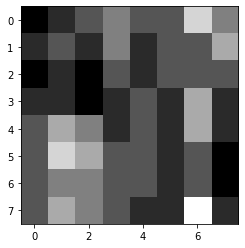

In [11]:
start_time = time.time()

recovered_block_1 = recoverOneBlock(sampledBlock_1)
print("finished in %s seconds" % (time.time() - start_time))


imgShow(recovered_block_1)
print(recovered_block_1)
print(boat_block_1)

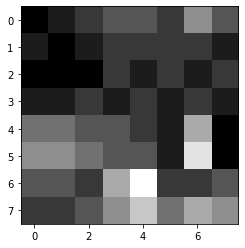

In [12]:
imgShow(boat_block_1)

### Recover all blocks

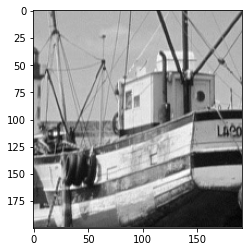

In [13]:
imgShow(imgBoat)

finished in 166.78157138824463 seconds
(200, 192)


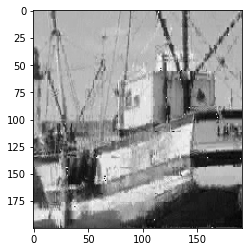

In [14]:
start_time = time.time()
BoatRecover = imgRecover(imgBoat, 8, 20)
print("finished in %s seconds" % (time.time() - start_time))

print(BoatRecover.shape)
imgShow(BoatRecover)

In [5]:
start_time = time.time()
NatureRecover = imgRecover(imgNature, 16, 100)
print("finished in %s seconds" % (time.time() - start_time))

print(NatureRecover.shape)
imgShow(NatureRecover)


KeyboardInterrupt: 

In [6]:
print(mean_squared_error(NatureRecover, imgNature))

291.4613952636719
